# LSN: Esercitazione 2

## Esercizio 02.1

1) In questo primo punto abbiamo valutato questo integrale
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
utilizzando un campionamento Monte Carlo. In particolare abbiamo considerato l'integrale in questa forma:
$$I = \int_0^1 g(x)p(x) dx$$
dove $g(x) = \frac{\pi}{2}\cos(\frac{\pi}{2}x)$ e $p(x)$ è una distribuzione di probabilità uniforme tra 0 e 1.

Utilizzando il blocking method, abbiamo quindi calcolato l'integrale, valutando il valore di $g(x)p(x)$ in $L$ punti (per ognuno degli $N$ blocchi) estratti da $p(x)$ e considerandone poi la media. In formule
$$I = (1-0)\langle f \rangle_{[0,1]} = \frac{1}{L}\sum_{i=1}^{L}g(x_i)p(x_i)$$

Il blocking method ci ha fornito una stima per $I$ e la sua incertezza, al crescere del numero di blocchi considerati (e quindi al crescere del numero di tiri). Plottando $\langle I\rangle -1$ in funzione del numero di tiri osserviamo una buona convergenza al valore atteso.

In [1]:
import subprocess
tmp=subprocess.call("make main01.exe", shell=True)
tmp=subprocess.call("./main01.exe")

print("Codice eseguito!")

Codice eseguito!


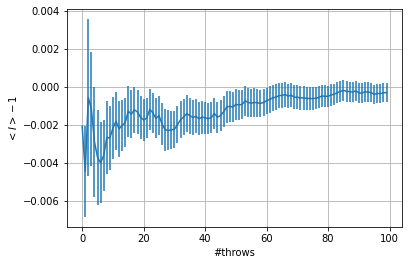

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import scipy
import scipy.stats

# Carico i dati da file
I_prog, err_prog = ((np.genfromtxt('./Data/Es02.1/I_es2.1.a.txt', usecols=i, autostrip=True)) for i in range(2))

x = np.arange(len(I_prog))
    
# Disegno il plot
plt.errorbar(x,I_prog-1.,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel(r'$<I> -1$')
plt.grid(True)
plt.show()

2) Nella seconda parte ci viene richiesto di utilizzare l'importance sampling (campionamento rilevante) per stimare lo stesso integrale $I$. Questo significa che abbiamo cercato una PDF ottimale, che minimizzi la varianza $\sigma^2_I$ e garantisca una convergenza più veloce ad 1. Abbiamo quindi riscritto l'integrale in questa forma:
$$ I=\int_0^1 \frac{g(x)p(x)}{q(x)} q(x)dx $$
in cui $q(x)$ è una PDF e $\frac{g(x)p(x)}{q(x)}<\infty$ eccetto che su un insieme di punti di misura zero.

La PDF che garantisce che la varianza sia minima (ovvero nulla) si ottiene utilizzando i moltiplicatori di Lagrange e ha la forma
$$ q(x) = \frac{g(x)p(x)}{I} = \frac{\frac{\pi}{2}\cos(\pi x/2)}{I}= \frac{\pi}{2}\cos(\pi x/2)$$

Per ottenere una PDF di questo tipo utilizziamo il metodo della trasformata e generiamo la variabile aleatoria
$$ x = \frac{2}{\pi}\sin^{-1}y$$
con $y$ variabile uniforme tra 0 e 1.

Quindi abbiamo eseguito questo calcolo (sempre utilizzando il blocking method):
$$G_L = \frac{1}{L}\sum_{i=1}^L\frac{g(x_i)p(x_i)}{q(x_i)} = \frac{1}{L}\sum_{i=1}^L I \frac{g(x_i)p(x_i)}{g(x_i)p(x_i)} = I $$ 

La convergenza al valore atteso ($I=1$) è quindi presente sin dal primo blocco e l'incertezza statistica ottenuta dal blocking method è uguale a zero.

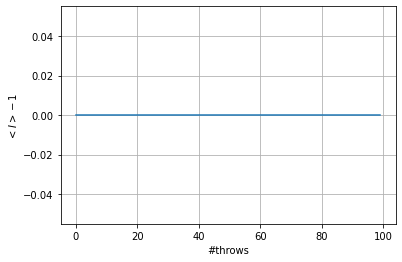

In [3]:
# Carico i dati da file
I_prog, err_prog = ((np.genfromtxt('./Data/Es02.1/I_es2.1.b.txt', usecols=i, autostrip=True)) for i in range(2))

x = np.arange(len(I_prog))

# Disegno il plot
plt.errorbar(x,I_prog-1.,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel(r'$<I>-1$')
plt.grid(True)
plt.show()

## Esercizio 02.2

1) Nella prima parte di questo esercizio ci viene richiesto di simulare il comportamento di un Random Walk tridimensionale su un reticolo cubico caratterizzato da una distanza tra i vari punti del reticolo pari ad $a = 1$.

Partendo dall'origine $(0,0,0)$ dobbiamo valutare il valore di $\sqrt{\langle r^2_i\rangle_{RW}}$ dove $i$ rappresenta il passo i-esimo del random walk e $\langle ...\rangle_{RW}$ denota la media effettuata su un grande numero (nel nostro caso $10^4$) di diversi random walk.

Per valutare $r_i^2$ abbiamo simulato per $10^4$ random walk i primi $i \in [1,100]$ passi e ne abbiamo calcolato la media e la deviazione standard della media tramite il blocking method, ottenendo $\langle r_i^2\rangle_{RW}$ e $\sigma_i/\sqrt{n}$, dove $n$ è il numero dei blocchi utilizzati.

Per calcolare la deviazione standard della grandezza in esame dobbiamo ricorrere alla propagazione dell'errore. In particolare otteniamo la seguente incertezza statistica:

$$\frac{\partial \sqrt{\langle r^2_i\rangle_{RW}}}{\partial \langle r^2_i\rangle_{RW}}*\frac{\sigma_i}{\sqrt n} = \frac{\sigma_i/\sqrt n}{2\sqrt{\langle r^2_i\rangle_{RW}}} $$

Nel grafico presente nella cella successiva possiamo osservare che la simulazione restituisce l'andamento atteso. Infatti, tramite un fit, notiamo che $\sqrt{\langle r^2_i\rangle_{RW}} = 1.00*i^{0.50}$. Questo significa che il processo che stiamo studiando ha un comportamento diffusivo.

In [4]:
tmp=subprocess.call("make main02.exe", shell=True)
tmp=subprocess.call("./main02.exe")

print("Codice eseguito!")

Codice eseguito!


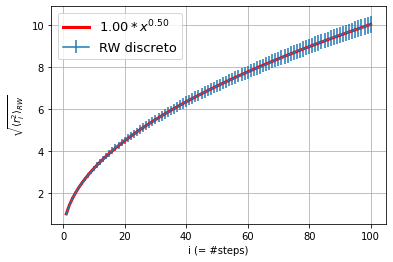

In [5]:
# Carico i dati da file
R_prog, err_prog = ((np.genfromtxt('./Data/Es02.2/Rsquared_es2.2.a.txt', usecols=i, autostrip=True)) for i in range(2))

x = np.arange(len(R_prog)) + 1

for i in range(len(R_prog)):
    R_prog[i] = np.sqrt(R_prog[i])
    err_prog[i] = err_prog[i]/(2*R_prog[i])

# Fitto i dati con una funzione della forma a*i^b
def f(x,a,b):
    return a * x**b
    
param, param_cov = scipy.optimize.curve_fit(f, xdata = x, ydata=R_prog)
y = param[0]*x**(param[1])

# Disegno il plot
plt.errorbar(x, R_prog, yerr=err_prog, label = 'RW discreto')
plt.plot(x, y, '-r', linewidth = 3, label = r'$%6.2f * x^{%6.2f}$'%(param[0],param[1]))
plt.xlabel('i (= #steps)')
plt.ylabel(r'$\sqrt{\langle r_i^2\rangle_{RW}}$')
plt.grid(True)

# Aggiungo la legenda
plt.rc('legend', fontsize=13)
plt.legend(loc=2)
plt.show()

2) In questa seconda parte abbiamo effettuato la medesima simulazione del punto precendente, ma per un random walk continuo nello spazio. In altre parole, sempre mantenendo il numero di passi fissato a 100, abbiamo generato dei punti con passo $a=1$; la direzione e il verso del passo sono stati campionati generando un angolo solido nello spazio tridimensionale. Le coordinate del camminatore all'i-esimo passo sono quindi:

\begin{cases}
  x_i &= x_{i-1} + a \sin\theta\cos\phi \\
  y_i &= y_{i-1} + a \sin\theta\sin\phi \\
  z_i &= z_{i-1} + a \cos\theta 
\end{cases}

Abbiamo quindi calcolato $\langle r_i^2\rangle_{RW}$ e la sua incertezza statistica dividendo le $10^4$ simulazioni in $n=100$ blocchi e poi tracciato lo stesso grafico del caso precedente.

Anche questa volta il fit ha mostrato che la curva ottenuta segue un andamento che va come la radice del numero passi. Anche in questo caso quindi stiamo osservando un processo di diffusione.

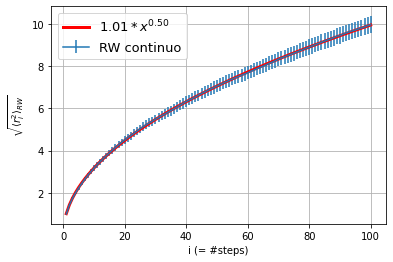

In [6]:
# Carico i dati da file
R_prog, err_prog = ((np.genfromtxt('./Data/Es02.2/Rsquared_es2.2.b.txt', usecols=i, autostrip=True)) for i in range(2))

x = np.arange(len(R_prog)) + 1

for i in range(len(R_prog)):
    R_prog[i] = np.sqrt(R_prog[i])
    err_prog[i] = err_prog[i]/(2*R_prog[i])

# Fitto i dati con una funzione della forma a*i^b
def f(x,a,b):
    return a * x**b
    
param, param_cov = scipy.optimize.curve_fit(f, xdata = x, ydata=R_prog)
y = param[0]*x**(param[1])
    
# Disegno il plot
plt.errorbar(x, R_prog, yerr=err_prog, label = 'RW continuo')
plt.plot(x, y, '-r', linewidth = 3, label = r'$%6.2f * x^{%6.2f}$'%(param[0],param[1]))
plt.xlabel('i (= #steps)')
plt.ylabel(r'$\sqrt{\langle r_i^2\rangle_{RW}}$')
plt.grid(True)

# Aggiungo la legenda
plt.rc('legend', fontsize=13)
plt.legend(loc=2)
plt.show()

In [7]:
tmp=subprocess.call("make clean", shell=True)